In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
spotifytrack=pd.read_csv('../data/spotifytracksclean.csv')

In [3]:
spotifytrack

,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,...,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.658,...,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.281,...,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.722,...,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.785,...,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.843,...,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.236,...,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.283,...,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
6358,332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.770,...,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
6359,333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.191,...,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


In [4]:
spotifytrack=spotifytrack.drop(columns=['Unnamed: 0'])

In [5]:
spotifytrack

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.658,0.246,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.281,0.133,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.722,0.366,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.785,0.206,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.843,0.526,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.236,0.430,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
6357,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.283,0.543,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
6358,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.770,0.583,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
6359,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.191,0.830,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


In [6]:
the50sval=spotifytrack.loc[spotifytrack['Year'].between(1950,1959)]

In [7]:
the50sval=the50sval.groupby(by='Year')['Valence'].mean().to_frame().reset_index()

In [8]:
the50sval.to_csv('../data/Visuals/50sgraph.csv')

In [9]:
custom_palette = sns.color_palette("crest")

Text(0.5, 1.0, 'Average Valence 1950s')

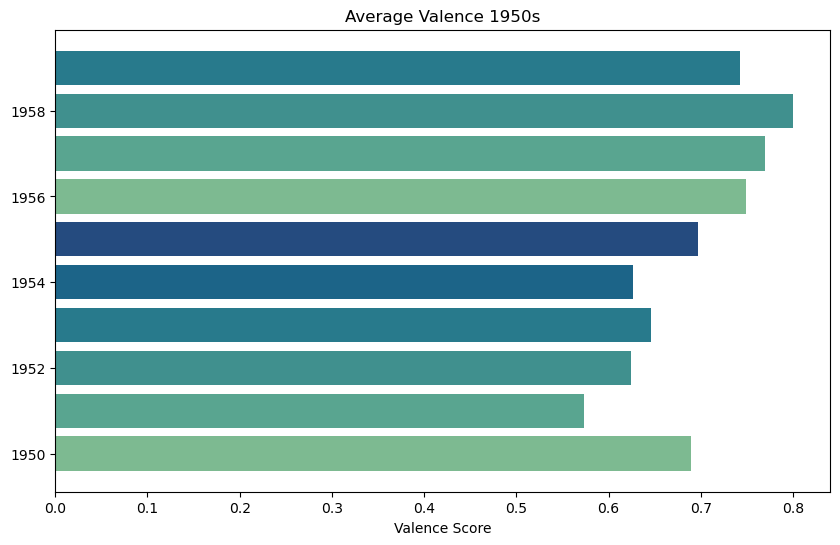

In [10]:
fifties=plt.figure(figsize=(10, 6)) 
plt.barh(y='Year',width='Valence',data=the50sval,color=custom_palette)
plt.xlabel ('Valence Score')
plt.title ('Average Valence 1950s')

In [11]:
allyears=spotifytrack.groupby(by='Decade')['Valence'].mean().to_frame().reset_index()

In [12]:
allyears['Valence'] = allyears['Valence'].round(3)

In [13]:
allyears

,Decade,Valence
0,1950's,0.693
1,1960's,0.697
2,1970's,0.660
3,1980's,0.655
4,1990's,0.583
5,2000's,0.583
6,2010's,0.502
7,2020's,0.505


In [14]:
valence_decade50=spotifytrack.loc[spotifytrack['Decade']=="2020's"]

In [15]:
valence_decade50 = valence_decade50['Valence'].max()

In [16]:
print("the highest valence scores in the 1970's was",valence_decade50)

the highest valence scores in the 1970's was 0.972


In [17]:
toptrack50=spotifytrack.loc[(spotifytrack['Decade']=="2020's") & (spotifytrack['Valence']==0.972)]

In [18]:
most_positive_track= toptrack50['Title'].iloc[0]
artist = toptrack50['Artist'].iloc[0]
genre = toptrack50['Main Genre'].iloc[0]

In [19]:
print("the most positive song in the 1960's was",most_positive_track)
print('by',artist )
print('Genre:',genre)

the most positive song in the 1960's was Doja
by Central Cee
Genre: Hip-Hop


In [20]:
toptrack50

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
6099,Doja,Central Cee,Doja,88,https://open.spotify.com/track/3LtpKP5abr2qqju...,0.38,0.911,-7.43,0.972,0.573,0.403,140.04,True,0.0,melodic drill,Hip-Hop,2022,2020's,1.62,Positive


In [21]:
unaltered=pd.read_csv('../data/unalteredtracks.csv')

In [22]:
positive_genre=spotifytrack.groupby(['Decade', 'Main Genre'])['Valence'].mean().reset_index()

In [23]:
positive_genre= positive_genre.groupby('Decade').apply(lambda x: x.nlargest(3, 'Valence')).reset_index(drop=True)

In [24]:
positive_genre

,Decade,Main Genre,Valence
0,1950's,Rock,0.823114
1,1950's,Country,0.751040
2,1950's,Blues,0.701806
3,1960's,Reggae,0.986000
4,1960's,Alternative,0.860000
5,1960's,Calypso,0.800000
6,1970's,Hip-Hop,0.827000
7,1970's,Reggae,0.818353
8,1970's,Disco,0.791673
9,1980's,Reggae,0.852938


<BarContainer object of 24 artists>

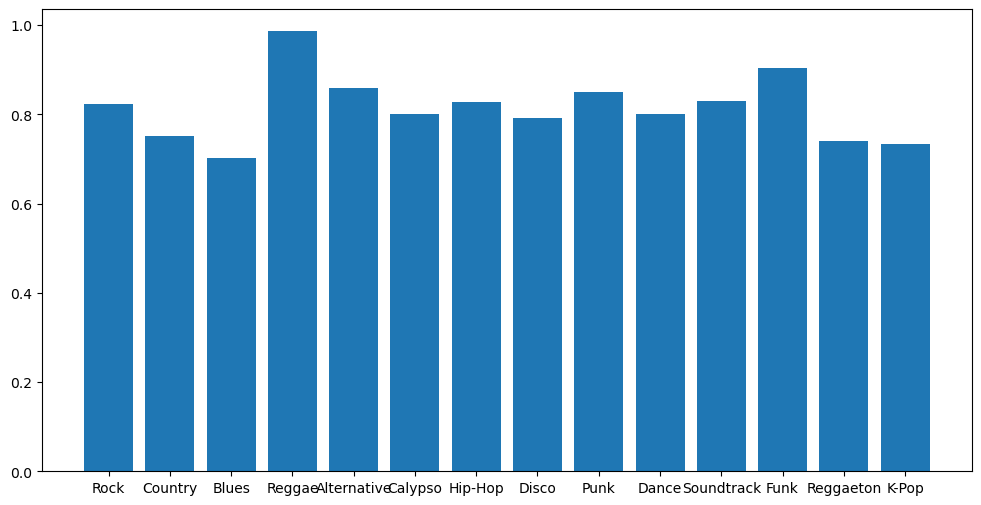

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(x='Main Genre',height='Valence',data=positive_genre)

In [26]:
topthreetrends=spotifytrack.loc[spotifytrack['Main Genre'].isin(['Pop','Rock','R&B'])]

In [27]:
fifty=topthreetrends.loc[topthreetrends['Decade']=="1950's"]

In [28]:
fifty

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
13,Money (That's What I Want) - Single Version / ...,Barrett Strong,The Collection,63,https://open.spotify.com/track/6OsefWNJtsWqO7m...,0.349,0.656,-7.324,0.960,0.813,0.1140,132.313,False,0.000000,rhythm and blues,R&B,1959,1950's,2.64,Positive
22,Rock The Joint,Bill Haley and His Comets,Universal Masters Collection,15,https://open.spotify.com/track/6uBOECJH1ZDjm83...,0.397,0.781,-9.284,0.670,0.822,0.2810,94.416,False,0.000003,rockabilly,Rock,1952,1950's,2.26,Positive
23,Rock Around The Clock,Bill Haley and His Comets,Biggest Hits,55,https://open.spotify.com/track/34AmZ4PMz9iNZVp...,0.139,0.609,-13.106,0.930,0.526,0.0946,173.179,False,0.000000,rockabilly,Rock,1954,1950's,2.28,Positive
24,"See You Later, Alligator",Bill Haley and His Comets,Rockin' The Joint,56,https://open.spotify.com/track/05eNEozACh10Rn0...,0.272,0.663,-10.070,0.814,0.758,0.3190,157.198,False,0.000000,rockabilly,Rock,1955,1950's,2.78,Positive
25,Crazy Man Crazy,Bill Haley Jr. and the Comets,Bill Haley Jr. and the Comets,19,https://open.spotify.com/track/0PgWyoqPJO6DGVP...,0.312,0.587,-6.133,0.804,0.673,0.1830,87.490,False,0.000008,rockabilly,Rock,1953,1950's,3.94,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Well Oh Well,Tiny Bradshaw,"Heavy Juice, The King Recordings 1950-55",8,https://open.spotify.com/track/7ChX0DDPbcwJf8l...,0.589,0.690,-3.903,0.809,0.904,0.0992,107.083,False,0.000000,rhythm and blues,R&B,1950,1950's,2.69,Positive
462,Rocket 69,Todd Rhodes,The Henry Glover Story Pt. 2 - It Ain't the Me...,42,https://open.spotify.com/track/3HduVsBhmUkYS97...,0.306,0.685,-7.984,0.764,0.587,0.1140,137.556,False,0.000000,rhythm and blues,R&B,1952,1950's,2.72,Positive
463,Nite Owl,Tony Allen and The Champs,"Doo-Wop the Best (The Cadillacs, The Orioles, ...",40,https://open.spotify.com/track/0HrLwnyuodY5z5f...,0.885,0.602,-10.206,0.571,0.283,0.1030,84.511,False,0.000010,doo-wop,R&B,1955,1950's,2.75,Positive
464,Mercy Mr Percy,Varetta Dillard,"Mercy, Mr Percy",10,https://open.spotify.com/track/3HJRbVUmjGBrwSg...,0.485,0.548,-9.487,0.749,0.623,0.2190,122.755,False,0.000001,rhythm and blues,R&B,1953,1950's,2.82,Positive


In [29]:
avg_val_fifty = fifty.groupby('Main Genre')['Valence'].mean()

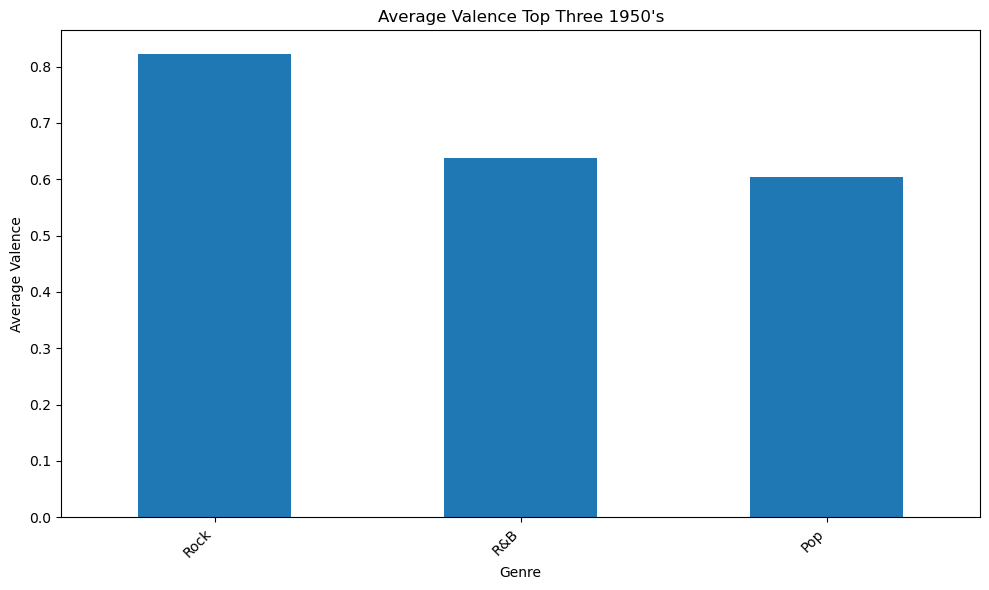

In [30]:
plt.figure(figsize=(10, 6))
avg_val_fifty.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Valence')
plt.title("Average Valence Top Three 1950's")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [31]:
sixty=topthreetrends.loc[topthreetrends['Decade']=="1960's"]

In [32]:
avg_val_sixty = sixty.groupby('Main Genre')['Valence'].mean()

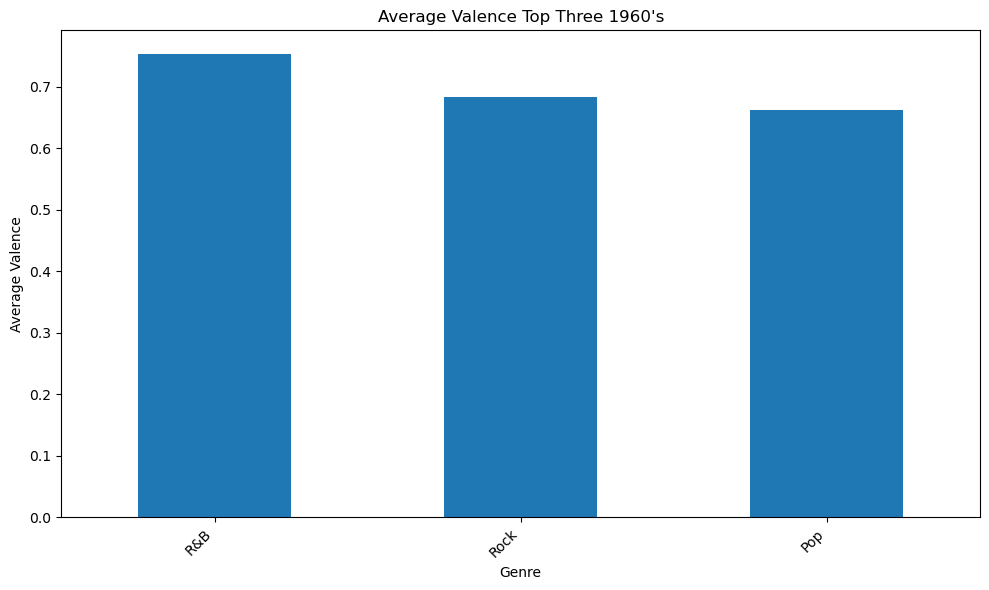

In [33]:
plt.figure(figsize=(10, 6))
avg_val_sixty.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Valence')
plt.title("Average Valence Top Three 1960's")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [34]:
seventy=topthreetrends.loc[topthreetrends['Decade']=="1970's"]

In [35]:
avg_val_seventy = seventy.groupby('Main Genre')['Valence'].mean()

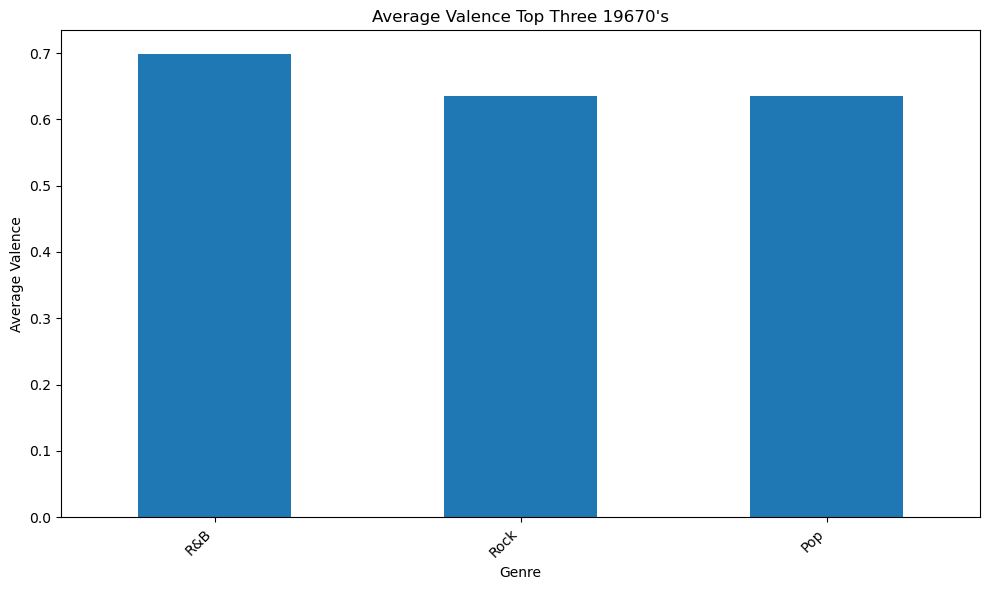

In [36]:
plt.figure(figsize=(10, 6))
avg_val_seventy.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Valence')
plt.title("Average Valence Top Three 19670's")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [37]:
top_three_per_decade= topthreetrends.groupby(['Decade', 'Main Genre'])['Valence'].mean().reset_index()

In [38]:
top_three_per_decade

,Decade,Main Genre,Valence
0,1950's,Pop,0.603556
1,1950's,R&B,0.638244
2,1950's,Rock,0.823114
3,1960's,Pop,0.662386
4,1960's,R&B,0.754358
5,1960's,Rock,0.683046
6,1970's,Pop,0.634686
7,1970's,R&B,0.699303
8,1970's,Rock,0.635068
9,1980's,Pop,0.657098


C:\Users\joshc\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


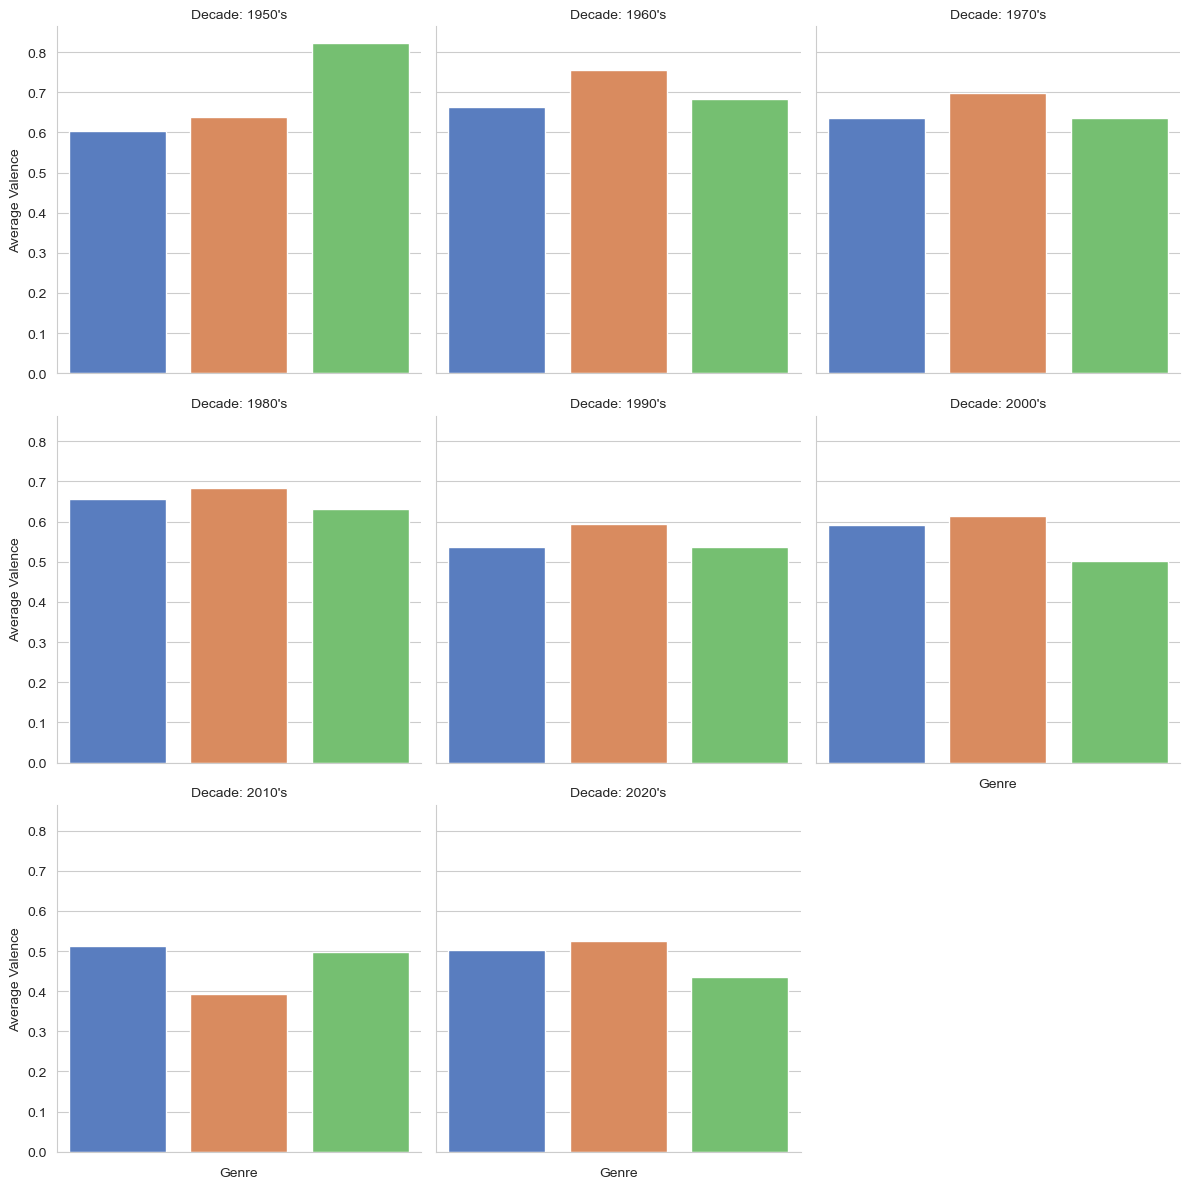

In [39]:
sns.set_style('whitegrid')
facetdecade = sns.FacetGrid(top_three_per_decade, col='Decade', col_wrap=3, height=4)
facetdecade.map(sns.barplot, 'Main Genre', 'Valence', palette='muted')  # Specify order of genres
facetdecade.set_axis_labels('Genre', 'Average Valence')
facetdecade.set_titles('Decade: {col_name}')
facetdecade.set_xticklabels(rotation=45, ha='right')

# Adjust x-axis labels
for ax in facetdecade.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

In [40]:
spotifytrack

,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,Valence,Energy,Liveness,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category
0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,0.658,0.246,0.1320,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive
1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,0.281,0.133,0.0707,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative
2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,0.722,0.366,0.1320,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive
3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,0.785,0.206,0.1240,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive
4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,0.843,0.526,0.0975,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,0.236,0.430,0.0887,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative
6357,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,0.283,0.543,0.1760,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative
6358,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,0.770,0.583,0.1440,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive
6359,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,0.191,0.830,0.1560,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative


In [51]:
full_data=pd.read_csv('../data/spotify_full_data.csv')

In [52]:
full_data

,Unnamed: 0.1,Unnamed: 0,Title,Artist,Album,Popularity,Track URL,Acousticness,Danceability,Loudness,...,Tempo,Explicit,Instrumentalness,Sub_Genre,Main Genre,Year,Decade,Duration(mins),Emotion Category,artist_category
0,0,0,"Bad, Bad Whiskey",Amos Milburn,Let's Have A Party! (The Aladdin Recordings),25,https://open.spotify.com/track/1XByDNjGTqsqkl7...,0.9740,0.874,-10.500,...,115.146,False,0.01110,piano blues,Blues,1950,1950's,2.92,Positive,Solo
1,1,1,"One Scotch, One Bourbon, One Beer",Amos Milburn,Down The Road Apiece -The Best Of Amos Milburn,50,https://open.spotify.com/track/1T7ZI5Z9XHFeSZU...,0.8110,0.908,-17.630,...,118.678,False,0.09380,piano blues,Blues,1953,1950's,2.94,Negative,Solo
2,2,2,Let Me Go Home Whiskey,Amos Milburn,Let's Have A Party! (The Aladdin Recordings),29,https://open.spotify.com/track/33343QHpDEcf022...,0.9760,0.908,-12.726,...,121.300,False,0.01290,piano blues,Blues,1953,1950's,2.80,Positive,Solo
3,3,3,Stack-A'Lee,Archibald,"Saga Blues: New Orleans Rhythm and Blues ""Good...",3,https://open.spotify.com/track/141cfH3W9II7dWJ...,0.9910,0.802,-15.019,...,125.915,False,0.89500,new orleans soul,Soul,1950,1950's,4.50,Positive,Solo
4,4,4,My Baby Left Me - Remastered 2003,"Arthur ""Big Boy"" Crudup",Rock Me Mama - When The Sun Goes Down Series,36,https://open.spotify.com/track/5WgAbfjSEt2ycl9...,0.8100,0.788,-11.888,...,108.290,False,0.00000,blues,Blues,1951,1950's,2.35,Positive,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,6356,330,Falling,Trevor Daniel,Nicotine,2,https://open.spotify.com/track/2rRJrJEo19S2J82...,0.1230,0.784,-8.756,...,127.087,False,0.00000,melodic rap,Hip-Hop,2020,2020's,2.66,Negative,Solo
6357,6357,331,Past Life (with Selena Gomez),Trevor Daniel,Past Life (with Selena Gomez),65,https://open.spotify.com/track/7MN8RYSofZsFROB...,0.1020,0.575,-5.062,...,159.905,False,0.00000,melodic rap,Hip-Hop,2020,2020's,3.11,Negative,Solo
6358,6358,332,Level of Concern,Twenty One Pilots,Level of Concern,69,https://open.spotify.com/track/6xZ4Q2k2ompmDpp...,0.3200,0.754,-7.340,...,122.012,False,0.00015,pop,Hip-Hop,2020,2020's,3.67,Positive,Group
6359,6359,333,t r a n s p a r e n t s o u l feat. Travis Barker,WILLOW,t r a n s p a r e n t s o u l feat. Travis Barker,67,https://open.spotify.com/track/1QL7nSDZCwZMnbi...,0.0021,0.390,-5.201,...,90.021,True,0.00000,pop,Pop,2021,2020's,2.80,Negative,Group


In [53]:
category_percent=full_data.loc[full_data['artist_category'].isin(['Solo','Group'])]

In [54]:
category_percent=category_percent['artist_category'].value_counts().to_frame().reset_index()
category_percent=category_percent.rename(columns={'index':'Category','artist_category':'Count'})

In [65]:
category_percent

,Category,Count
0,Solo,2631
1,Group,2014


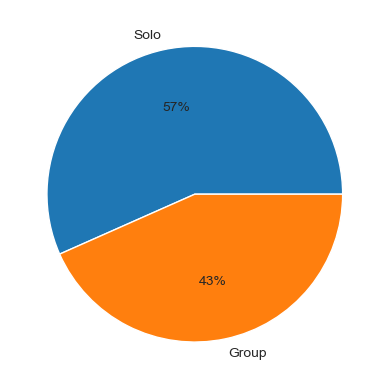

In [70]:
plt.pie(category_percent['Count'], labels=category_percent.Category,autopct='%.0f%%');